# Image Convolution and Correlation

This notebook implements image convolution and correlation from scratch using a rectangular mask of any odd size. The mask is loaded from an ASCII text file. We will test the implementation with 3x3, 7x7, and 11x11 averaging filters.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_images(images, titles):
    plt.figure(figsize=(20, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

Image loaded successfully.


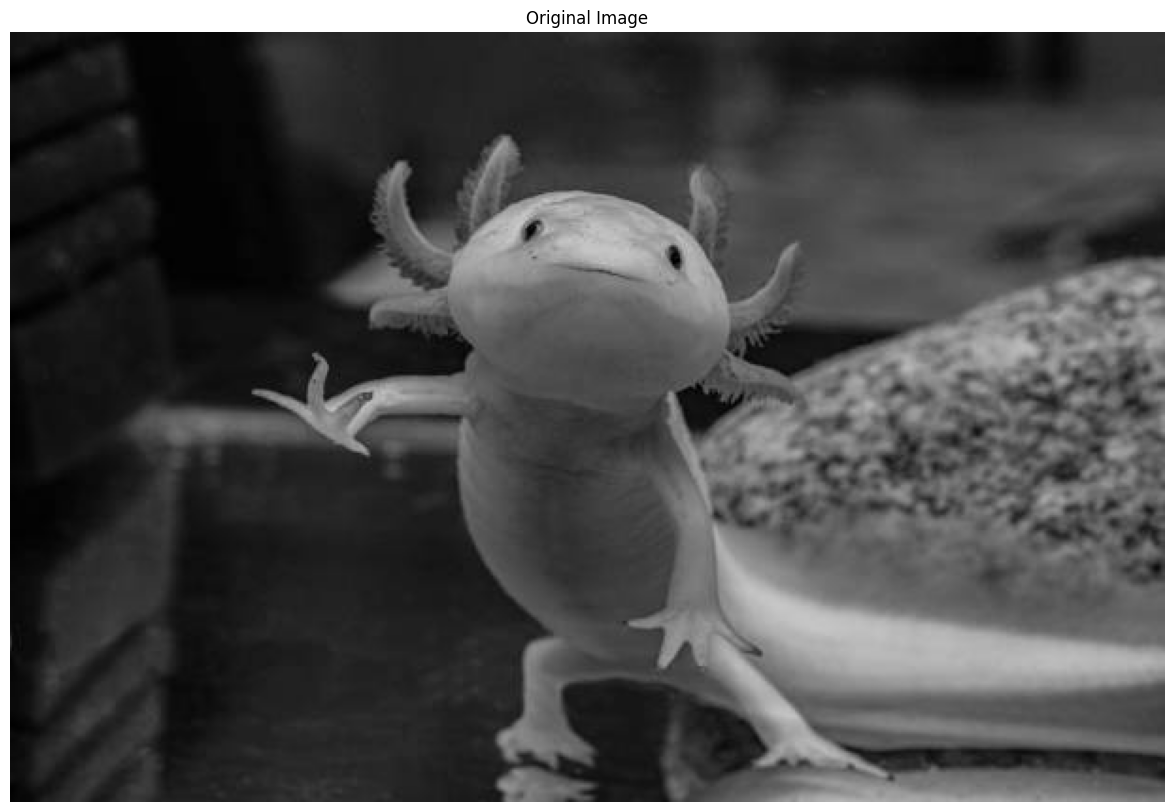

In [3]:
# Load the image
image_path = '../../input.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    print("Image loaded successfully.")
    display_images([image], ["Original Image"])

In [4]:
def load_kernel(file_path):
    """Loads a kernel from an ASCII text file."""
    return np.loadtxt(file_path, dtype=np.float32)

In [5]:
def apply_filter(image, kernel, operation='convolution'):
    """
    Applies convolution or correlation to an image.

    Args:
        image (np.ndarray): The input image.
        kernel (np.ndarray): The kernel/mask.
        operation (str): 'convolution' or 'correlation'.

    Returns:
        np.ndarray: The filtered image.
    """
    # For convolution, we need to flip the kernel
    if operation == 'convolution':
        kernel = np.flipud(np.fliplr(kernel))

    # Get dimensions
    img_h, img_w = image.shape
    ker_h, ker_w = kernel.shape

    # Calculate padding
    pad_h = ker_h // 2
    pad_w = ker_w // 2

    # Create padded image
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), 'constant')

    # Create output image
    output_image = np.zeros_like(image, dtype=np.float32)

    # Apply the kernel
    for y in range(img_h):
        for x in range(img_w):
            # Extract the region of interest
            roi = padded_image[y:y + ker_h, x:x + ker_w]
            # Perform element-wise multiplication and sum
            output_image[y, x] = np.sum(roi * kernel)

    # Normalize the output for averaging filters
    if np.sum(kernel) != 0:
        output_image /= np.sum(kernel)

    return np.clip(output_image, 0, 255).astype(np.uint8)

## Testing with Averaging Kernels

In [6]:
# File paths for the kernels
kernel_paths = {
    "3x3": "3x3_avg.txt",
    "7x7": "7x7_avg.txt",
    "11x11": "11x11_avg.txt"
}

# Load the kernels
kernels = {name: load_kernel(path) for name, path in kernel_paths.items()}

# Print kernels to verify
for name, kernel in kernels.items():
    print(f"--- {name} Kernel ---")
    print(kernel)
    print()

--- 3x3 Kernel ---
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

--- 7x7 Kernel ---
[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]

--- 11x11 Kernel ---
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]



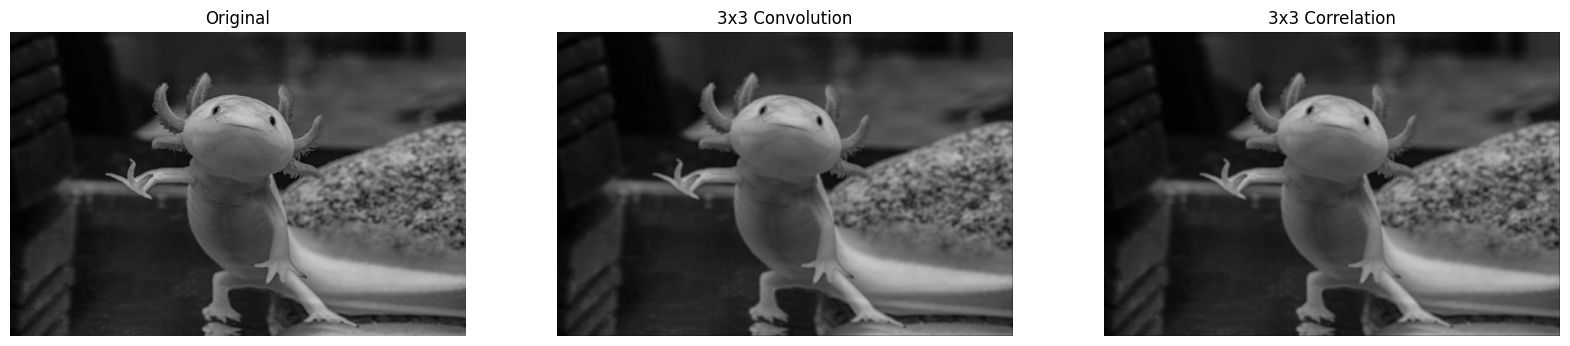

In [7]:
# Apply 3x3 kernel
kernel_3x3 = kernels["3x3"]
conv_3x3 = apply_filter(image, kernel_3x3, 'convolution')
corr_3x3 = apply_filter(image, kernel_3x3, 'correlation')

# Since the kernel is symmetric, convolution and correlation will produce the same result.
display_images([image, conv_3x3, corr_3x3],
               ["Original", "3x3 Convolution", "3x3 Correlation"])

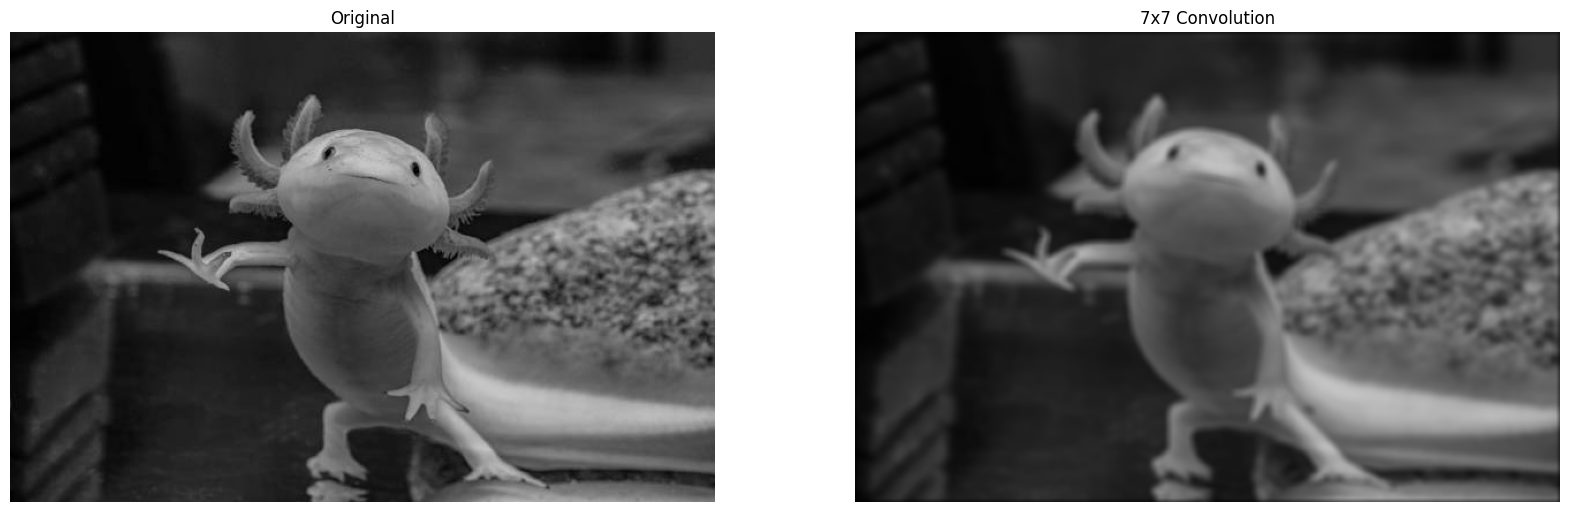

In [8]:
# Apply 7x7 kernel
kernel_7x7 = kernels["7x7"]
conv_7x7 = apply_filter(image, kernel_7x7, 'convolution')

display_images([image, conv_7x7],
               ["Original", "7x7 Convolution"])

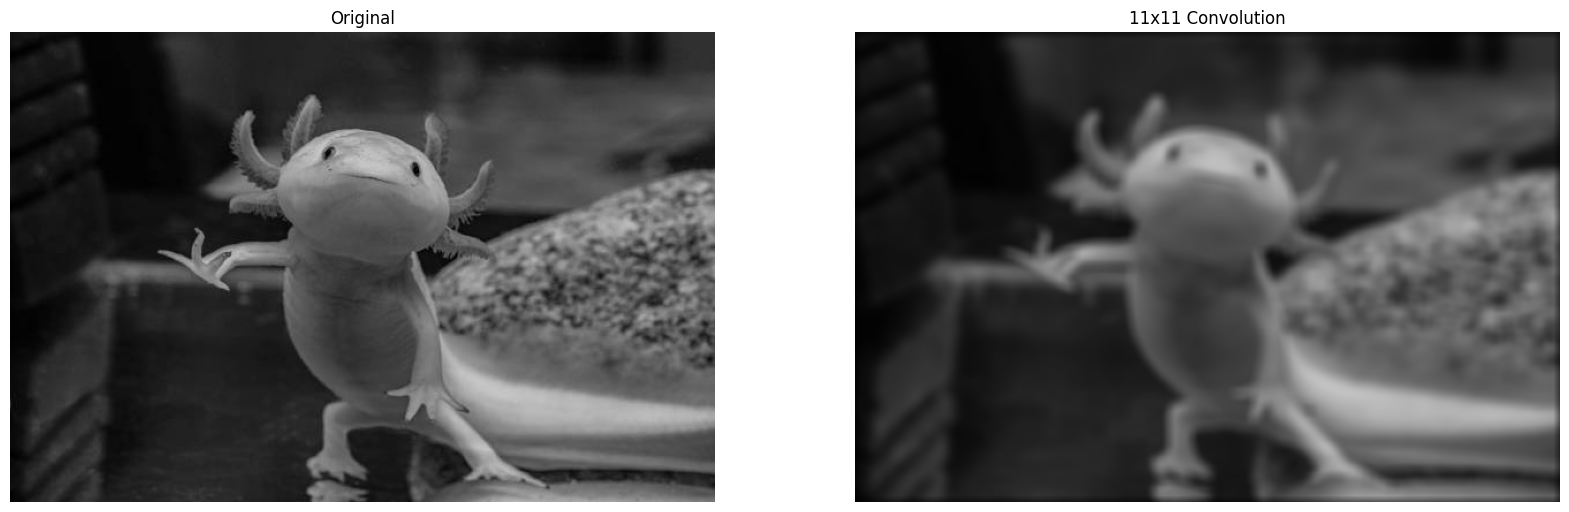

In [9]:
# Apply 11x11 kernel
kernel_11x11 = kernels["11x11"]
conv_11x11 = apply_filter(image, kernel_11x11, 'convolution')

display_images([image, conv_11x11],
               ["Original", "11x11 Convolution"])